In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('bikes_rent.csv')

In [4]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,10.486773,2114
727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,4.656485,3095
728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,3.725374,1341
729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,10.505372,1796


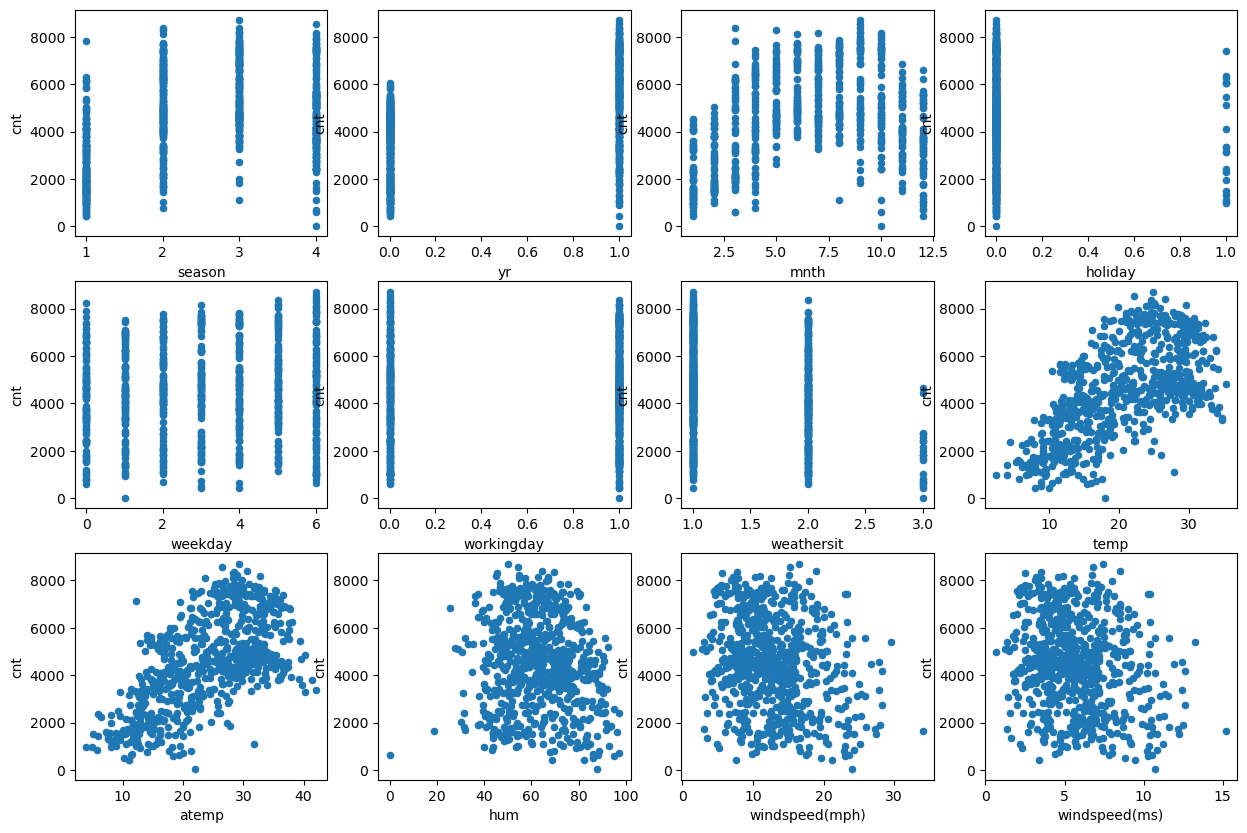

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, "cnt", subplots=False, kind="scatter", ax=axes[int(idx / 4), idx % 4])

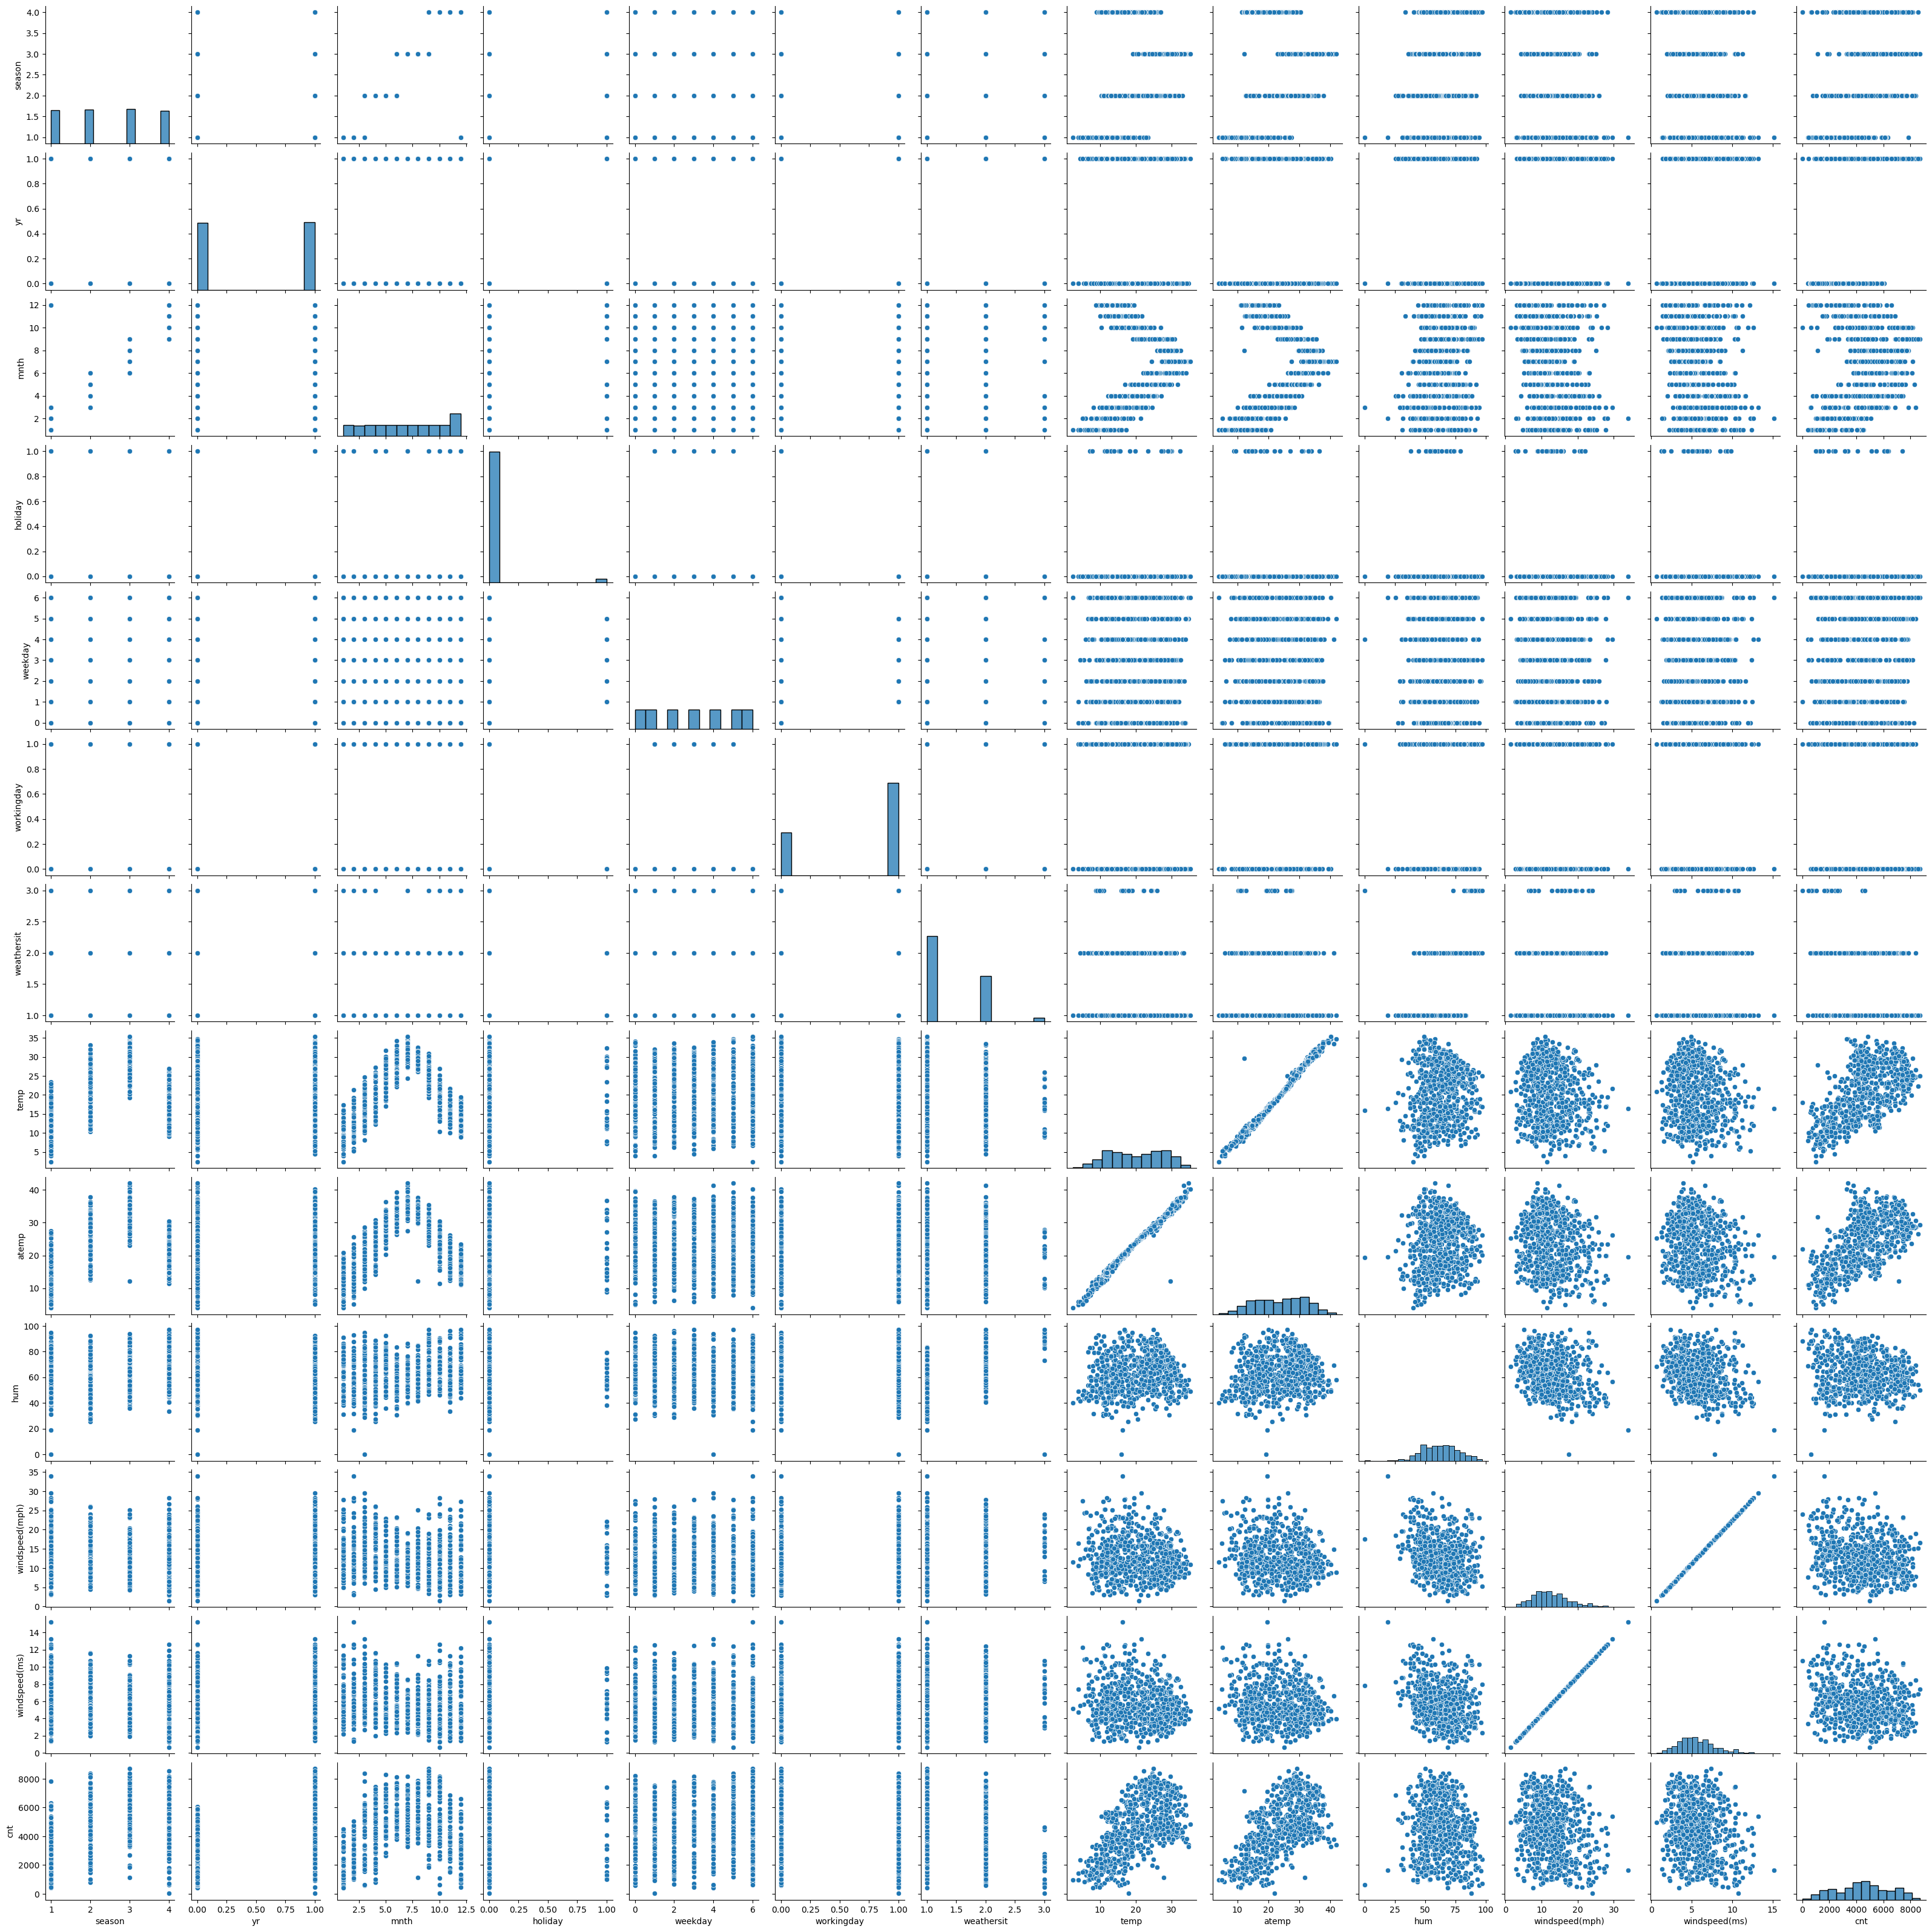

In [6]:
sns.pairplot(df)

In [7]:
features_all = df[df.columns[:-1]]
answers = df['cnt']

In [8]:
features_all.corrwith(answers)

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64

In [11]:
df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)' , 'cnt']].corr()

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


In [12]:
features_weather = df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']]
features_weather.corr()

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


In [13]:
df.mean()

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

In [14]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [15]:
df_shuffled = shuffle(df, random_state=123)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
def show_w(columns, coef):
    weights = list(zip(columns, coef))
    for i in range(len(columns)-1):
        print ("{}: {}".format(weights[i][0], weights[i][1]))

In [19]:
reg = LinearRegression().fit(features_all, answers)

In [20]:
reg.coef_

array([ 5.14275162e+02,  2.04393628e+03, -4.09632308e+01, -5.19387318e+02,
        6.84952725e+01,  1.21295932e+02, -6.06460105e+02,  4.89977058e+01,
        7.19129210e+01, -1.02302285e+01,  2.40105098e+12, -5.37115104e+12])

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
show_w(df.columns, lin_reg.coef_)

season: 570.8662182506498
yr: 1021.9690965502141
mnth: -141.30167846599736
holiday: -86.75778585286979
weekday: 137.22515111907433
workingday: 56.390022929515126
weathersit: -330.2306165403223
temp: 367.48019505339107
atemp: 585.5523085039431
hum: -145.6088492316741
windspeed(mph): 12456116075336.902
windspeed(ms): -12456116075535.36


In [32]:

from sklearn.linear_model import Lasso, Ridge

In [33]:
lin_reg = Lasso()
lin_reg.fit(X, y)
show_w(df.columns, lin_reg.coef_)

season: 560.2416160308868
yr: 1019.4634940657196
mnth: -128.73062703678764
holiday: -86.152781333711
weekday: 137.34789390496317
workingday: 55.21237064135667
weathersit: -332.3698569623486
temp: 376.3632362096957
atemp: 576.5307935045539
hum: -144.12915500348606
windspeed(mph): -197.13968940249657
windspeed(ms): -2.8039043578214148e-08


In [34]:
lin_reg = Ridge()
lin_reg.fit(X, y)
show_w(df.columns, lin_reg.coef_)

season: 563.0645722520204
yr: 1018.9483787875304
mnth: -131.87332028247917
holiday: -86.74609799709222
weekday: 138.00511117871898
workingday: 55.9031103750648
weathersit: -332.3497884990733
temp: 386.4578891919485
atemp: 566.3470470600256
hum: -145.0713272986717
windspeed(mph): -99.2594410817865
windspeed(ms): -99.25944115434693


In [35]:
# Код 3.1 (1 балл)
alphas = np.arange(1, 500, 10)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1])) # матрица весов размера (число регрессоров) x (число признаков)
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))
# Для каждого значения коэффициента из alphas обучите регрессор Lasso
# и запишите веса в соответствующую строку матрицы coefs_lasso (вспомните встроенную в python функцию enumerate),
# а затем обучите Ridge и запишите веса в coefs_ridge.

In [41]:
for i,val in enumerate(alphas):
    lin_reg = Lasso(alpha=val)
    coefs_lasso[i]=lin_reg.fit(X, y).coef_
    lin_reg = Ridge(alpha=val)
    coefs_ridge[i]=lin_reg.fit(X, y).coef_

In [43]:
for idx, alpha in enumerate(alphas):
    lasso = Lasso(alpha = alpha)
    lasso.fit(X, y)
    coefs_lasso[idx] = lasso.coef_   
    ridge = Ridge(alpha = alpha)
    ridge.fit(X, y)
    coefs_ridge[idx] = ridge.coef_   

Text(0.5, 1.0, 'Lasso')

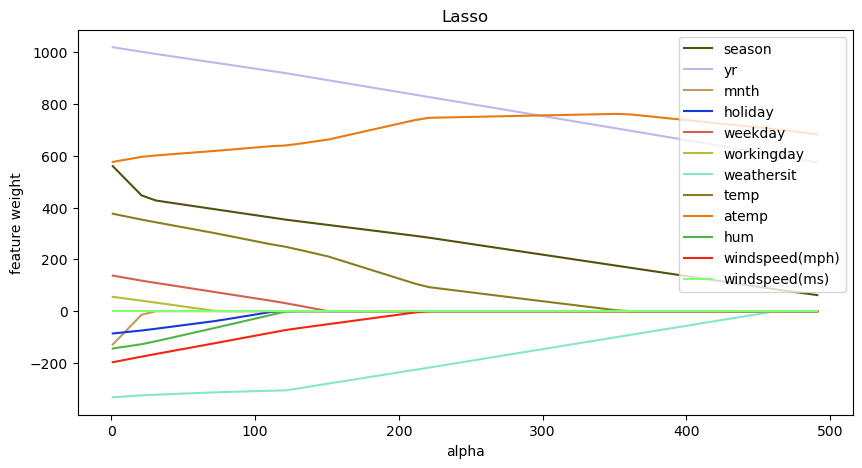

In [51]:
plt.figure(figsize=(10, 5))
for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend()
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

Text(0.5, 1.0, 'Ridge')

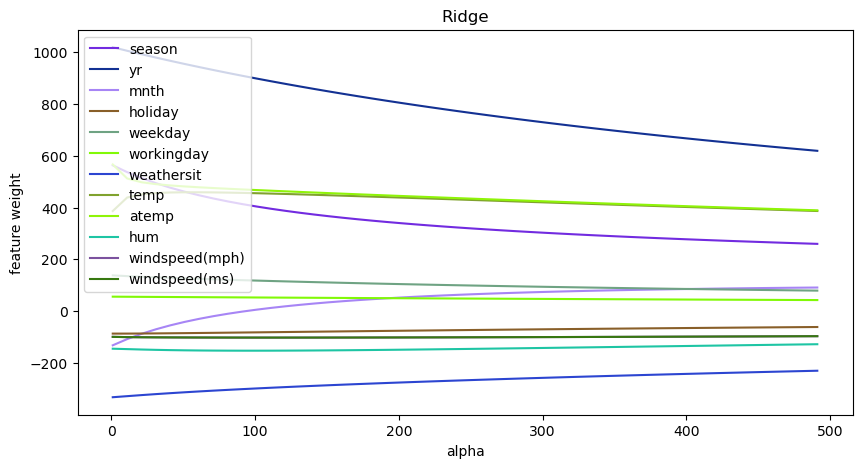

In [48]:
plt.figure(figsize=(10, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend()
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

In [96]:
from sklearn.linear_model import LassoCV


In [97]:
# Код 3.2 (1 балл)
# Обучите регрессор LassoCV на всех параметрах регуляризации из alpha
# Постройте график _усредненного_ по строкам MSE в зависимости от alpha. 
# Выведите выбранное alpha, а также пары "признак-коэффициент" для обученного вектора коэффициентов

In [98]:
lin_reg = LassoCV(n_alphas=len(alphas),alphas=alphas)
lin_reg.fit(X, y)
show_w(df.columns, lin_reg.coef_)

season: 532.0189828413538
yr: 1015.0602226430597
mnth: -100.03952614356652
holiday: -83.29395987529911
weekday: 132.50446549095813
workingday: 51.55708561407377
weathersit: -330.55985673998146
temp: 370.6798550300316
atemp: 581.3969310655002
hum: -140.0074055006887
windspeed(mph): -191.7714084713614
windspeed(ms): -2.6843803308483105e-08


In [99]:
lin_reg.alphas_

array([96, 91, 86, 81, 76, 71, 66, 61, 56, 51, 46, 41, 36, 31, 26, 21, 16,
       11,  6,  1])

In [100]:
MMSE=lin_reg.mse_path_.mean(axis=1)

In [101]:
MMSE

array([849449.08743355, 843681.79324282, 838255.15624693, 833134.36244028,
       827959.09299448, 823065.89133964, 818432.55863598, 814141.00752537,
       810211.92720919, 806645.23552249, 803440.79714266, 800598.69734127,
       798118.71664544, 796000.98553144, 793975.14659756, 791618.79507581,
       789268.39652093, 786330.23006498, 784380.47867632, 794456.27955306])

Text(0, 0.5, 'MMSE')

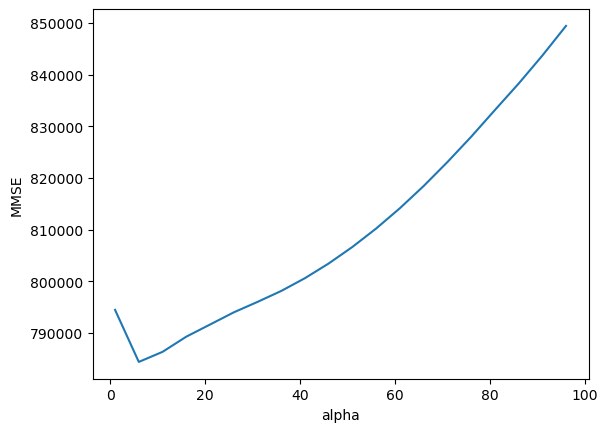

In [102]:
plt.plot(lin_reg.alphas_,MMSE)
plt.xlabel("alpha")
plt.ylabel("MMSE")

In [103]:
lin_reg.alpha_

6

In [104]:
lin_reg.coef_

array([ 5.32018983e+02,  1.01506022e+03, -1.00039526e+02, -8.32939599e+01,
        1.32504465e+02,  5.15570856e+01, -3.30559857e+02,  3.70679855e+02,
        5.81396931e+02, -1.40007406e+02, -1.91771408e+02, -2.68438033e-08])

In [105]:
show_w(df.columns, lin_reg.coef_)

season: 532.0189828413538
yr: 1015.0602226430597
mnth: -100.03952614356652
holiday: -83.29395987529911
weekday: 132.50446549095813
workingday: 51.55708561407377
weathersit: -330.55985673998146
temp: 370.6798550300316
atemp: 581.3969310655002
hum: -140.0074055006887
windspeed(mph): -191.7714084713614
windspeed(ms): -2.6843803308483105e-08


Было выбрано автоматически следующее alpha = 6
season: 532.0189828413538
yr: 1015.0602226430597
mnth: -100.03952614356652
holiday: -83.29395987529911
weekday: 132.50446549095813
workingday: 51.55708561407377
weathersit: -330.55985673998146
temp: 370.6798550300316
atemp: 581.3969310655002
hum: -140.0074055006887
windspeed(mph): -191.7714084713614
windspeed(ms): -2.6843803308483105e-08


Text(0, 0.5, 'mean')

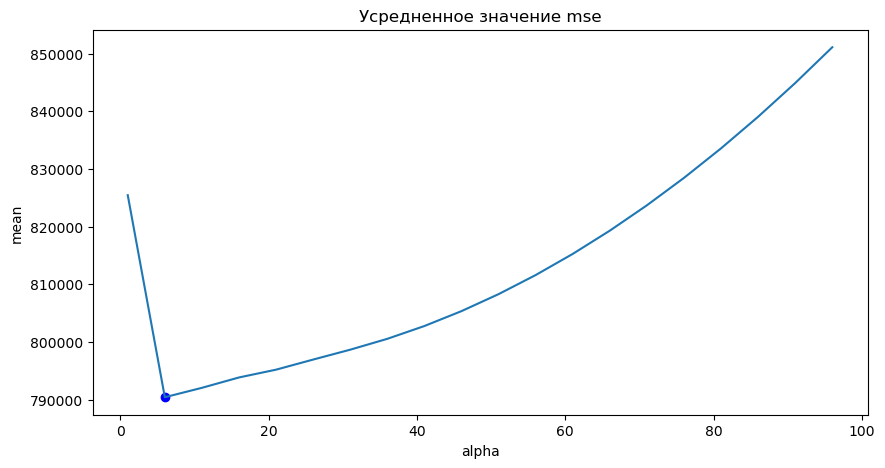

In [106]:
alphas = np.arange(1, 100, 5)
lasso_cv = LassoCV(alphas = alphas, cv = 3)
reg = lasso_cv.fit(X, y)
splits = reg.mse_path_.T
mse_list = reg.mse_path_.mean(axis = 1)
mse_min = np.min(mse_list)

print('Было выбрано автоматически следующее alpha =', reg.alpha_)
show_w(df.columns, reg.coef_)

plt.figure(figsize=(10, 5))
plt.plot(reg.alpha_, mse_min, 'bo', reg.alphas_, mse_list)
plt.title('Усредненное значение mse')
plt.xlabel("alpha")
plt.ylabel("mean")

In [134]:
splits

array([[863936.50981215, 860479.31511364, 857344.83606082,
        854526.73639431, 852024.62341384, 849838.18755425,
        847967.16232762, 846411.31812808, 845170.45707972,
        844244.40861679, 843633.02568868, 843336.18149882,
        843353.76670095, 843616.44582031, 843608.19759457,
        844145.56423514, 845219.34650306, 846828.77496205,
        848973.80188236, 851701.88999353],
       [826364.11936907, 821110.18177761, 816153.27782428,
        811496.34805693, 807139.39657173, 803082.42338526,
        799325.42849761, 795868.41190876, 792711.37361871,
        789854.31362747, 787297.23193504, 785040.12854141,
        783083.00344659, 781425.85665058, 780068.68815337,
        777586.36117475, 775290.91645251, 773628.85569644,
        772598.49562777, 878936.94016416],
       [862993.29751896, 853075.13780625, 843628.81286098,
        834654.45357262, 826152.16399015, 818122.01934907,
        810564.07404745, 803478.3674151 , 796864.92788593,
        790723.77601555, 7850

In [114]:
mins=splits.min(axis=1)

In [133]:
reg.alphas_

array([96, 91, 86, 81, 76, 71, 66, 61, 56, 51, 46, 41, 36, 31, 26, 21, 16,
       11,  6,  1])

In [137]:
for i in range(len(splits)):
    indx=np.where(splits[i]== mins[i] )
    print(reg.alphas_[indx],mins[i])

[41] 843336.1814988208
[6] 772598.4956277699
[1] 745668.605960805


In [144]:
np.argmin(splits[0])

11

1 разбиение имеет минимум mse = 843336.1814988208 при alpha = 41
2 разбиение имеет минимум mse = 772598.4956277699 при alpha = 6
3 разбиение имеет минимум mse = 745668.605960805 при alpha = 1


Text(0, 0.5, 'mean')

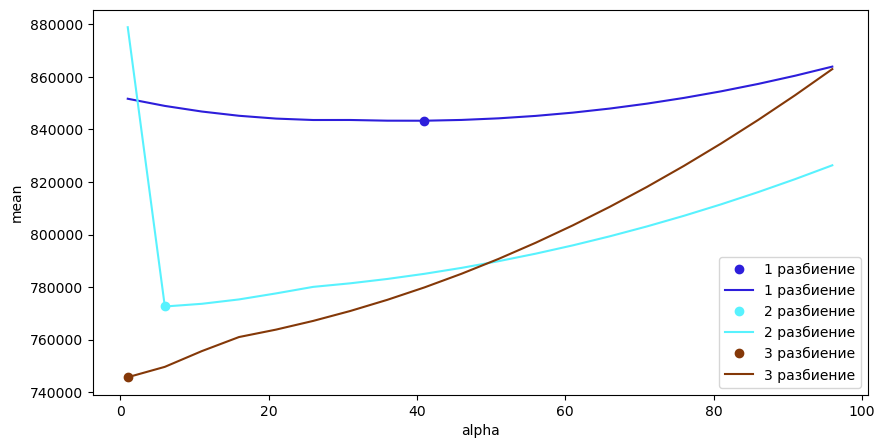

In [146]:
plt.figure(figsize=(10, 5))
for idx, split in enumerate(splits):
    label = str(idx + 1) + ' разбиение'
    min_mse = np.min(split)
    alpha_argmin = reg.alphas_[np.argmin(split)]
    print("{} имеет минимум mse = {} при alpha = {}".format(label, min_mse, alpha_argmin))
    plt.plot(alpha_argmin, min_mse, 'bo', reg.alphas_, split, label = label, color=np.random.rand(3))
plt.legend()
plt.xlabel("alpha")
plt.ylabel("mean")

In [150]:
reg.coef_

array([ 5.32018983e+02,  1.01506022e+03, -1.00039526e+02, -8.32939599e+01,
        1.32504465e+02,  5.15570856e+01, -3.30559857e+02,  3.70679855e+02,
        5.81396931e+02, -1.40007406e+02, -1.91771408e+02, -2.68438033e-08])

In [151]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)',
       'cnt'],
      dtype='object')

In [171]:
np.argpartition(reg.coef_, 4)

array([10,  6,  9,  2,  3, 11,  5,  7,  8,  1,  4,  0], dtype=int64)

In [172]:
df.columns[np.argpartition(reg.coef_, 4)[:4]]

Index(['windspeed(mph)', 'weathersit', 'hum', 'mnth'], dtype='object')

In [173]:
mas=[]
for i in reg.coef_:
    if abs(i)< 1e-3:
        mas.append(np.where(reg.coef_== i ))
df.columns[mas]

array([[['windspeed(ms)']]], dtype=object)

NameError: name 'many_scatters' is not defined